In [614]:
import pandas as pd


activitats = pd.read_csv('activitats.csv', encoding = 'latin-1')
notes = pd.read_csv('notes.csv', sep=';', encoding = 'latin-1')
notes.rename(columns = {notes.columns[0]: 'userid'}, inplace = True)
trameses = pd.read_csv('trameses.csv', sep=',', encoding = 'latin-1')
trameses.rename(columns = {trameses.columns[0]: 'tramesa_id'}, inplace = True)

In [615]:
activitats

,activitat_id,activitat,aula_id,startdate,duedate,grade
0,3,Problema 1.1 - Hello world!!!,87,0,0,100
1,4,Problema 1.2 - Hello world!!! ++,87,0,0,100
2,5,Problema 3a.1: Càlcul edat,87,0,0,100
3,6,Problema 3a.8: Conversió dòlars a euros,87,0,0,100
4,7,Problema 3a.11: Mitjana de notes,87,0,0,100
...,...,...,...,...,...,...
1796,4194,(OPCIONAL) Problema 9.24 Triple pitagòric,184,0,0,100
1797,4379,VPLParent,114,0,0,10
1798,4380,VPL Child - Duplicate Me as Needed,114,0,0,10
1799,4386,Lliurament Pràctica 5: NEW La Major,176,1571985000,1576745700,100


In [616]:
notes

,userid,aula_id,P_Grade,P_Grade_Date,F_Grade,F_Grade_Date,R_Grade,R_Grade_Date
0,176,92,NaN,NaN,"9,25",1667829600,NaN,1675173600
1,179,92,NaN,NaN,"7,75",1667829600,NaN,1675173600
2,168,92,NaN,NaN,"7,75",1667829600,NaN,1675173600
3,401,92,NaN,NaN,"3,50",1667829600,"8,25",1675173600
4,482,92,NaN,NaN,"7,00",1667829600,NaN,1675173600
...,...,...,...,...,...,...,...,...
1083,2818,184,NaN,1.730988e+09,NaN,1736949600,NaN,1738072800
1084,2822,184,NaN,1.730988e+09,NaN,1736949600,NaN,1738072800
1085,2836,184,NaN,1.730988e+09,NaN,1736949600,NaN,1738072800
1086,2982,184,NaN,1.730988e+09,NaN,1736949600,NaN,1738072800


In [617]:
trameses

,tramesa_id,activitat_id,userid,datesubmitted,grader,dategraded,grade,nevaluations
0,6,3,31,1658829978,0.0,1.658830e+09,100.0,1
1,7,362,26,1658837049,0.0,1.658837e+09,100.0,0
2,9,362,26,1658837075,0.0,1.658837e+09,100.0,0
3,15,362,31,1662537577,0.0,1.662538e+09,NaN,0
4,16,362,31,1662537593,0.0,1.662712e+09,100.0,0
...,...,...,...,...,...,...,...,...
547957,1235631,3567,2644,1729605745,0.0,1.729606e+09,60.0,17
547958,1235635,3573,1828,1729605824,0.0,0.000000e+00,NaN,0
547959,1235643,3573,1828,1729605880,0.0,0.000000e+00,NaN,1
547960,1235646,3567,2650,1729605935,0.0,1.729606e+09,100.0,6


In [618]:
userid_count = trameses['userid'].count()
print(userid_count)

547962


In [619]:
#COMPROBAR ACTIVIDADES VALIDAS
Act_Not = pd.merge(notes, activitats, on='aula_id', how='outer')
activitats_valides = Act_Not[Act_Not['F_Grade_Date'] > Act_Not['duedate']]['activitat_id'].unique()

#CLEAN TRAMESAS
#actividades validas en tramesas
trameses_1 = trameses[trameses['activitat_id'].isin(activitats_valides)]
trameses_1 = trameses_1.dropna(subset='grade')
trameses_filtered = trameses_1.groupby(['userid', 'activitat_id'])[['grade', 'nevaluations']].max()
#eliminar naans trameses
trameses_filtered

grade  nevaluations
userid activitat_id                     
21     362           100.0             1
       363           100.0             6
       366           100.0             3
       367           100.0             5
       368           100.0             4
...                    ...           ...
3008   3530          100.0             7
       3531          100.0             2
       3532          100.0             5
       3565           80.0            12
       3568           10.0            16

[97858 rows x 2 columns]

In [607]:
merged_df = pd.merge(trameses_filtered.reset_index(), activitats, on='activitat_id')
merged_df.rename(columns={'grade_x': 'grade', 'grade_y': 'gradeMax'}, inplace=True)
merged_df.drop(['activitat', 'startdate', 'duedate'], axis=1, inplace=True)
merged_df['grade'] = merged_df['grade'] / merged_df['gradeMax']
merged_df = merged_df.drop('gradeMax', axis=1)
merged_df

,userid,activitat_id,grade,nevaluations,aula_id
0,21,362,1.0,1,92
1,21,363,1.0,6,92
2,21,366,1.0,3,92
3,21,367,1.0,5,92
4,21,368,1.0,4,92
...,...,...,...,...,...
97853,3008,3530,1.0,7,176
97854,3008,3531,1.0,2,176
97855,3008,3532,1.0,5,176
97856,3008,3565,0.8,12,176


In [608]:
merged_df = merged_df.groupby(['userid', 'aula_id']).agg(
    grade_mean=('grade', 'mean'),
    Totalnevaluations=('nevaluations', 'sum'),
    Totalactividad_count=('activitat_id', 'size')
).reset_index()

merged_df

,userid,aula_id,grade_mean,Totalnevaluations,Totalactividad_count
0,21,92,0.862911,266,79
1,26,87,0.909091,9,11
2,26,92,1.000000,15,7
3,26,141,0.931034,14,58
4,26,143,0.986667,44,9
...,...,...,...,...,...
1100,2944,176,0.996610,220,59
1101,2982,184,0.984375,265,80
1102,2984,184,0.982143,129,70
1103,2999,176,0.903654,128,52


In [609]:
#save to csv
merged_df.to_csv('Clean.csv', index=False)

In [610]:
final_df = pd.merge(merged_df, notes, on=['userid', 'aula_id'])
final_df = final_df.dropna(subset=['F_Grade'])
final_df

,userid,aula_id,grade_mean,Totalnevaluations,Totalactividad_count,P_Grade,P_Grade_Date,F_Grade,F_Grade_Date,R_Grade,R_Grade_Date
0,21,92,0.862911,266,79,NaN,NaN,"3,25",1667829600,NaN,1675173600
1,35,92,0.943667,425,120,NaN,NaN,"5,00",1667829600,NaN,1675173600
2,57,92,0.907324,220,71,NaN,NaN,"1,00",1667829600,NaN,1675173600
3,57,143,0.887130,619,108,NaN,NaN,"2,8",1699884000,5,1706191200
4,65,92,0.914587,239,75,NaN,NaN,"7,25",1667829600,NaN,1675173600
...,...,...,...,...,...,...,...,...,...,...,...
738,2245,143,0.985278,151,72,NaN,NaN,"1,95",1699884000,NaN,1706191200
740,2253,143,0.864000,90,25,NaN,NaN,"1,6",1699884000,NaN,1706191200
741,2271,143,0.756250,7,8,NaN,NaN,"3,05",1699884000,"1,45",1706191200
742,2272,141,0.992963,415,135,"8,8",1.699625e+09,"8,35",1704636000,NaN,1707228000


In [611]:
final_df.drop(['userid','aula_id','P_Grade_Date', 'F_Grade_Date', 'R_Grade', 'R_Grade_Date', 'F_Grade_Date',], axis=1, inplace=True)
final_df

,grade_mean,Totalnevaluations,Totalactividad_count,P_Grade,F_Grade
0,0.862911,266,79,NaN,"3,25"
1,0.943667,425,120,NaN,"5,00"
2,0.907324,220,71,NaN,"1,00"
3,0.887130,619,108,NaN,"2,8"
4,0.914587,239,75,NaN,"7,25"
...,...,...,...,...,...
738,0.985278,151,72,NaN,"1,95"
740,0.864000,90,25,NaN,"1,6"
741,0.756250,7,8,NaN,"3,05"
742,0.992963,415,135,"8,8","8,35"


Logistic Regression - Accuracy: 0.75177304964539, Precision: 0.7184466019417476, Recall: 0.925, F1 Score: 0.8087431693989071
Ridge Classifier - Accuracy: 0.7446808510638298, Precision: 0.7156862745098039, Recall: 0.9125, F1 Score: 0.8021978021978022
Decision Tree Classifier - Accuracy: 0.624113475177305, Precision: 0.68, Recall: 0.6375, F1 Score: 0.6580645161290323
Random Forest Classifier - Accuracy: 0.7021276595744681, Precision: 0.7261904761904762, Recall: 0.7625, F1 Score: 0.7439024390243902


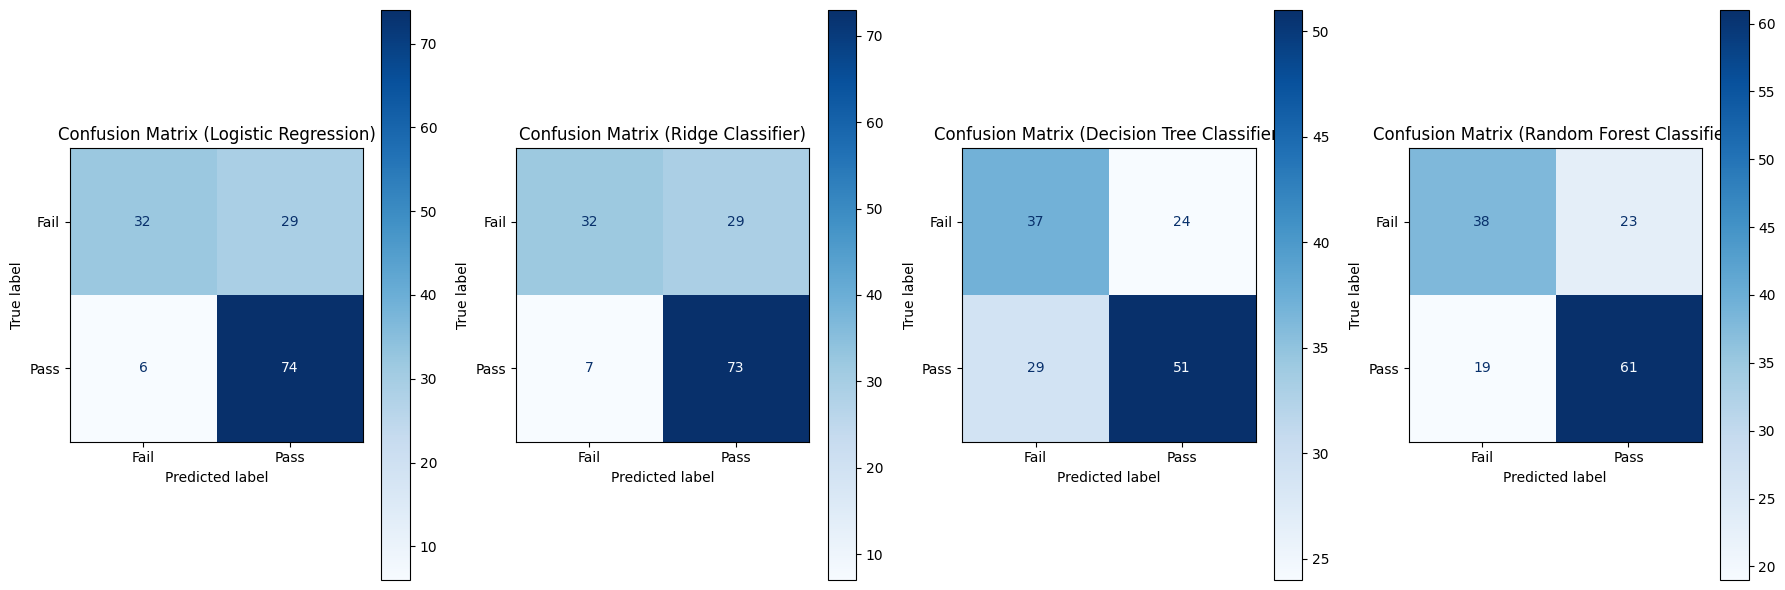

In [612]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data

# Convert string columns to float
final_df['Totalnevaluations'] = final_df['Totalnevaluations'].astype(float)
final_df['Totalactividad_count'] = final_df['Totalactividad_count'].astype(float)
final_df['F_Grade'] = final_df['F_Grade'].str.replace(',', '.').astype(float)

# Convert F_Grade to binary classification: 1 for pass, 0 for fail
threshold = 5.0  # Define your passing grade threshold
final_df['F_Grade_Binary'] = (final_df['F_Grade'] >= threshold).astype(int)

# Prepare the feature matrix X and target vector y
X = final_df[['grade_mean', 'Totalnevaluations', 'Totalactividad_count']]
y = final_df['F_Grade_Binary']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Ridge Classifier': RidgeClassifier(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier()
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1': f1, 'y_pred': y_pred}

# Print evaluation metrics
for name, metrics in results.items():
    print(f'{name} - Accuracy: {metrics["accuracy"]}, Precision: {metrics["precision"]}, Recall: {metrics["recall"]}, F1 Score: {metrics["f1"]}')

# Plot confusion matrices for each model
plt.figure(figsize=(18, 6))
for i, (name, metrics) in enumerate(results.items(), 1):
    cm = confusion_matrix(y_test, metrics['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Fail', 'Pass'])
    plt.subplot(1, 4, i)
    disp.plot(ax=plt.gca(), cmap='Blues', values_format='d')
    plt.title(f'Confusion Matrix ({name})')

plt.tight_layout()
plt.show()

In [613]:
# Initial count of user IDs
initial_userid_count = trameses['userid'].nunique()
print(f'Initial user ID count: {initial_userid_count}')

# After filtering valid activities
valid_activities_userid_count = trameses_1['userid'].nunique()
print(f'User ID count after filtering valid activities: {valid_activities_userid_count}')

# After grouping
grouped_userid_count = trameses_filtered.reset_index()['userid'].nunique()
print(f'User ID count after grouping: {grouped_userid_count}')
#merged_df
merged_df_userid_count = merged_df['userid'].nunique()
print(f'User ID count after merging: {merged_df_userid_count}')
#notes
notes_userid_count = notes['userid'].nunique()
print(f'User ID count in notes: {notes_userid_count}')
# After final merge
final_userid_count = final_df['userid'].nunique()
print(f'Final user ID count: {final_userid_count}')

Initial user ID count: 1021
User ID count after filtering valid activities: 1018
User ID count after grouping: 1018
User ID count after merging: 1018
User ID count in notes: 993


KeyError: 'userid'

In [ ]:
# Check unique user IDs in merged_df and notes
unique_userids_merged_df = merged_df['userid'].unique()
unique_userids_notes = notes['userid'].unique()

# Find common user IDs between merged_df and notes
common_userids = set(unique_userids_merged_df).intersection(set(unique_userids_notes))
print(f'Common user ID count: {len(common_userids)}')

# Find user IDs in merged_df but not in notes
userids_only_in_merged_df = set(unique_userids_merged_df) - set(unique_userids_notes)
print(f'User IDs only in merged_df: {len(userids_only_in_merged_df)}')

# Find user IDs in notes but not in merged_df
userids_only_in_notes = set(unique_userids_notes) - set(unique_userids_merged_df)
print(f'User IDs only in notes: {len(userids_only_in_notes)}')

# Check for common aula_id values
unique_aula_ids_merged_df = merged_df['aula_id'].unique()
unique_aula_ids_notes = notes['aula_id'].unique()

# Find common aula IDs between merged_df and notes
common_aula_ids = set(unique_aula_ids_merged_df).intersection(set(unique_aula_ids_notes))
print(f'Common aula ID count: {len(common_aula_ids)}')

# Find aula IDs in merged_df but not in notes
aula_ids_only_in_merged_df = set(unique_aula_ids_merged_df) - set(unique_aula_ids_notes)
print(f'Aula IDs only in merged_df: {len(aula_ids_only_in_merged_df)}')

# Find aula IDs in notes but not in merged_df
aula_ids_only_in_notes = set(unique_aula_ids_notes) - set(unique_aula_ids_merged_df)
print(f'Aula IDs only in notes: {len(aula_ids_only_in_notes)}')

In [ ]:
# Check the shape of final_df before dropping NaNs
print(f'final_df shape before dropping NaNs: {final_df.shape}')

# Check for NaNs in final_df
nan_counts = final_df.isna().sum()
print(f'NaN counts in final_df:\n{nan_counts}')

# Check the shape of final_df after dropping NaNs
final_df.dropna(inplace=True)
print(f'final_df shape after dropping NaNs: {final_df.shape}')

# Check the unique user IDs in final_df after dropping NaNs
final_userid_count_after_dropping_nans = final_df['userid'].nunique()
print(f'Final user ID count after dropping NaNs: {final_userid_count_after_dropping_nans}')